### Quantum Battery project

Step 1. Run below cell to import all package.

In [155]:
import matplotlib.pyplot as plt
import base.gradient
import base.object
import base.hamiltonian
import numpy as np
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Model 1

[-3.36241523+0.j]
[-0.13949311+0.j]
[-0.09755814+0.j]
[-0.05639126+0.j]
[-0.07250821+0.j]
[-0.06096311+0.j]
[-0.04827695+0.j]
[-0.03680525+0.j]
[-0.02744147+0.j]
[-0.02020692+0.j]
[-0.01477928+0.j]
[-0.01077039+0.j]
[-0.0078338+0.j]
[-0.00569207+0.j]
[-0.00413366+0.j]
[-0.00300106+0.j]
[-0.00217846+0.j]
[-0.00158122+0.j]
[-0.00114766+0.j]
[-0.00083297+0.j]
[-0.00060456+0.j]
[-0.00043878+0.j]
[-0.00031845+0.j]
[-0.00023113+0.j]
[-0.00016775+0.j]
[-0.00012175+0.j]
[-8.83608826e-05+0.j]
[-6.41302657e-05+0.j]
[-4.65442465e-05+0.j]
[-3.3780724e-05+0.j]
[-2.45172578e-05+0.j]
[-1.7794051e-05+0.j]
[-1.2914505e-05+0.j]
[-9.37304489e-06+0.j]
[-6.80273619e-06+0.j]
[-4.9372664e-06+0.j]
[-3.58335217e-06+0.j]
[-2.60071298e-06+0.j]
[-1.88753649e-06+0.j]
[-1.36992972e-06+0.j]
[-9.94262864e-07+0.j]
[-7.21612671e-07+0.j]
[-5.23729554e-07+0.j]
[-3.80110629e-07+0.j]
[-2.7587538e-07+0.j]
[-2.00223882e-07+0.j]
[-1.45317798e-07+0.j]
[-1.0546825e-07+0.j]
[-7.65463821e-08+0.j]
[-5.55555692e-08+0.j]
[-4.0320929

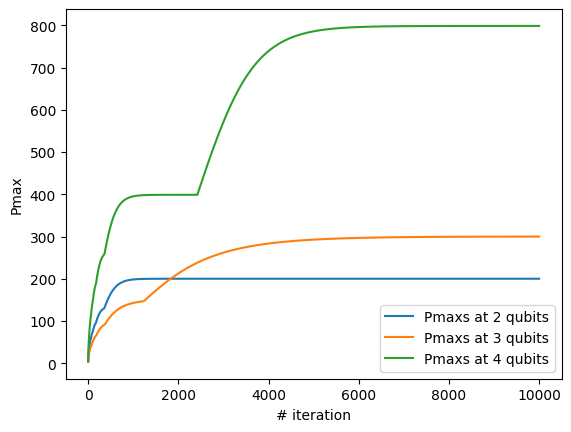

In [169]:

for num_qubits in [2,3,4]:
    thetas = np.ones(num_qubits - 1)
    thetas = thetas.astype(np.complex128)
    Pmaxs = []
    tmaxs = []
    num_iteration = 10000
    for i in range(0, num_iteration):
        h1 = base.hamiltonian.h1_xx(num_qubits, thetas)
        _, Pmax, tmax = base.gradient.find_Pmax(num_qubits, h1)
        Pmaxs.append(Pmax)
        tmaxs.append(tmax)
        grad_C = base.gradient.grad_Pmax(num_qubits, tmax, thetas, h1)
        thetas -= 1 * grad_C
        if i % 100 == 0:
            print(grad_C)
    plt.plot(range(0, num_iteration), Pmaxs, label=f"Pmaxs at {num_qubits} qubits")
plt.xlabel("# iteration")
plt.ylabel("Pmax")
plt.legend()

### Model 2

[-8.1746675 +0.j  4.80862794+0.j]
[-0.1158237 +8.8817842e-18j  0.06813159+0.0000000e+00j]
[-0.04241441+8.8817842e-18j  0.02494965+0.0000000e+00j]
[-0.01240611+8.8817842e-18j  0.00729771+0.0000000e+00j]
[-0.00355198-8.8817842e-18j  0.0020894 +0.0000000e+00j]
[-0.00101516+0.0000000e+00j  0.00059716-4.4408921e-18j]
[-0.00029009+8.8817842e-18j  0.00017064+0.0000000e+00j]
[-8.28965953e-05+0.j  4.87627031e-05+0.j]
[-2.36883067e-05+0.j  1.39342981e-05+0.j]
[-6.7691059e-06+0.j  3.9818270e-06+0.j]
[-1.93432122e-06+0.j  1.13783601e-06+0.j]
[-5.52746350e-07+0.j  3.25144912e-07+0.j]
[-1.57951288e-07-8.8817842e-18j  9.29125223e-08+4.4408921e-18j]
[-4.51357286e-08+0.0000000e+00j  2.65504286e-08-4.4408921e-18j]
[-1.28978627e-08-8.8817842e-18j  7.58697806e-09+0.0000000e+00j]
[-3.68565805e-09+0.j  2.16803415e-09+0.j]
[-1.05320366e-09-8.8817842e-18j  6.19531566e-10+0.0000000e+00j]
[-3.00960679e-10+0.j  1.77035693e-10+0.j]
[-8.60014371e-11+0.0000000e+00j  5.05890796e-11+4.4408921e-18j]
[-2.45756926e-11+0

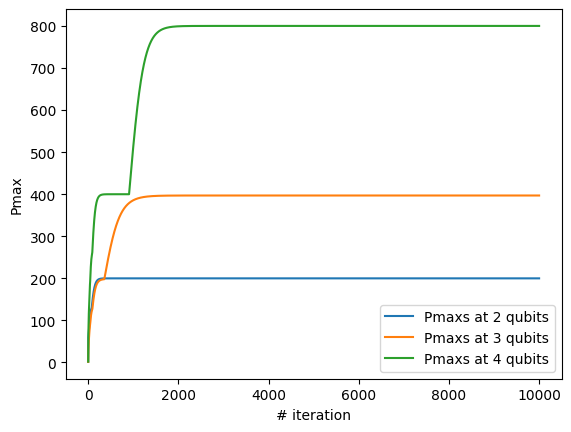

In [200]:
gamma = 0.7
for num_qubits in [2,3,4]:
    # num_qubits = 2
    thetas = np.ones(2*(num_qubits - 1))
    thetas = thetas.astype(np.complex128)
    Pmaxs = []
    tmaxs = []
    num_iteration = 10000
    for i in range(0, num_iteration):
        h1 = base.hamiltonian.h1_xy(num_qubits, thetas, gamma)
        _, Pmax, tmax = base.gradient.find_Pmax(num_qubits, h1)
        Pmaxs.append(Pmax)
        tmaxs.append(tmax)
        # grad_C = -grad_Pmax
        grad_C = base.gradient.grad_Pmax(num_qubits, tmax, thetas, h1, gamma)
        # if i == 0:
        #     m, v1 = list(np.zeros(thetas.shape[0])), list(
        #         np.zeros(thetas.shape[0]))
        # optimizer_params = [m, v1, i, grad_C]
        # thetas = optimizer.adam(thetas, *optimizer_params)
        thetas -= 1 * grad_C
        if i % 100 == 0:
            print(grad_C)
    plt.plot(range(0, num_iteration), Pmaxs, label=f"Pmaxs at {num_qubits} qubits")
plt.xlabel("# iteration")
plt.ylabel("Pmax")
plt.legend()

### Model 3

[-0.98551046+0.j  0.98551046+0.j]
[-0.62541716+0.j  0.62541716+0.j]
[-0.5000099+0.j  0.5000099+0.j]
[-0.45600075+0.j  0.45600075+0.j]
[-0.38573097+1.55431223e-17j  0.38573097-1.55431223e-17j]
[-0.34653379+1.44328993e-17j  0.34653379-1.44328993e-17j]
[-0.32669568+0.j  0.32669568+0.j]
[-0.31694363+0.j  0.31694363+0.j]
[-0.31082341+0.j  0.31082341+0.j]
[-0.27720219-5.55111512e-18j  0.27720219+5.55111512e-18j]
[-0.2827683+4.99600361e-18j  0.2827683-4.99600361e-18j]
[-0.25866282+0.j  0.25866282+0.j]
[-0.2342602+0.j  0.2342602+0.j]
[-0.25144091-4.4408921e-18j  0.25144091+4.4408921e-18j]
[-0.23471871+4.4408921e-18j  0.23471871-4.4408921e-18j]
[-0.21773572+4.4408921e-18j  0.21773572-4.4408921e-18j]
[-0.20088161-8.8817842e-18j  0.20088161+8.8817842e-18j]
[-0.22450125-3.88578059e-18j  0.22450125+3.88578059e-18j]
[-0.21354637+3.88578059e-18j  0.21354637-3.88578059e-18j]
[-0.20234257-3.88578059e-18j  0.20234257+3.88578059e-18j]
[-0.19105862+3.88578059e-18j  0.19105862-3.88578059e-18j]
[-0.17984052

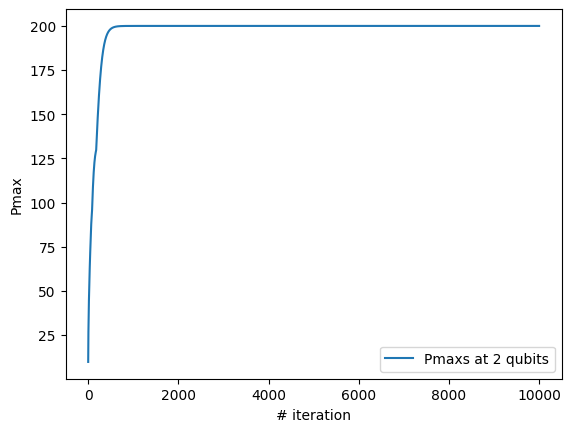

In [202]:

for num_qubits in [2]:
    # num_qubits = 2
    thetas = np.random.uniform(0,2*np.pi,2*(num_qubits - 1))
    thetas = thetas.astype(np.complex128)
    Pmaxs = []
    tmaxs = []
    num_iteration = 10000
    for i in range(0, num_iteration):
        h1 = base.hamiltonian.h1_xxz(num_qubits, thetas)
        _, Pmax, tmax = base.gradient.find_Pmax(num_qubits, h1)
        Pmaxs.append(Pmax)
        tmaxs.append(tmax)
        grad_C = base.gradient.grad_Pmax(num_qubits, tmax, thetas, h1)
        thetas -= 1 * grad_C
    plt.plot(range(0, num_iteration), Pmaxs, label=f"Pmaxs at {num_qubits} qubits")
print(tmax)
plt.xlabel("# iteration")
plt.ylabel("Pmax")
plt.legend()

<img src = './docs/1.png' height = '400px'>
<img src = './docs/2.png'  height = '400px'>